**Practicing Time series Analysis using Prophet Library with Bitcoin Prices dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

**Loading Bitcoin Prices dataset**

In [2]:
Input_data = "../input/bitcoinpricestimeseriesanalysisprophet/BITCOIN PRICES.csv"
df = pd.read_csv(Input_data)
df

,Unnamed: 0,Date,Value
0,0,1/1/2016,432.33
1,1,1/2/2016,433.94
2,2,1/3/2016,428.13
3,3,1/4/2016,433.00
4,4,1/5/2016,431.90
...,...,...,...
1884,1884,2/27/2021,46340.31
1885,1885,2/28/2021,46155.87
1886,1886,3/1/2021,45113.92
1887,1887,3/2/2021,49618.43


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Value'], dtype='object')

**Dropping unwanted column**

In [4]:
df.drop(['Unnamed: 0'], axis = 1,inplace = True)

**Renaming the column name**

In [5]:
df.rename(columns = {'Date':'ds', 'Value':'y'}, inplace = True)

In [6]:
df

,ds,y
0,1/1/2016,432.33
1,1/2/2016,433.94
2,1/3/2016,428.13
3,1/4/2016,433.00
4,1/5/2016,431.90
...,...,...
1884,2/27/2021,46340.31
1885,2/28/2021,46155.87
1886,3/1/2021,45113.92
1887,3/2/2021,49618.43


**Visualisation of actual datasets**

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BITCOIN PRICES')

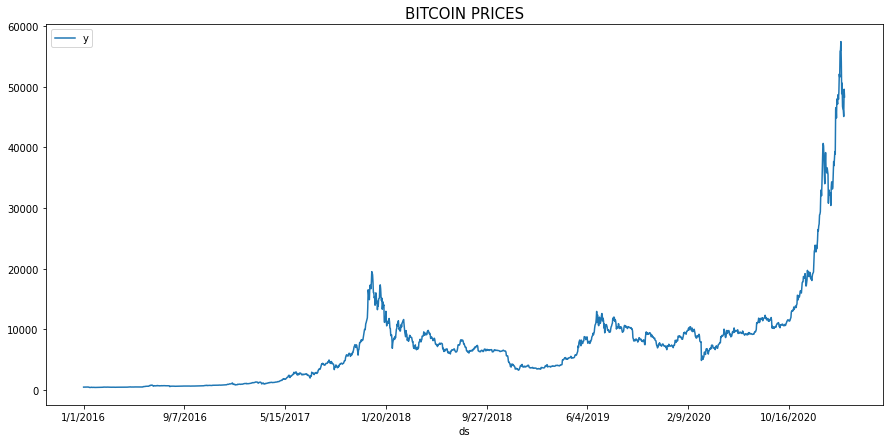

In [8]:
df.set_index('ds').plot(figsize = (15,7))
plt.title('BITCOIN PRICES', fontsize = 15)

**Fitting the model to dataset**

In [9]:
model = Prophet()

In [10]:
model.fit(df)

**Predicting Values for the next 100 days**

In [13]:
future = model.make_future_dataframe(periods = 100,freq = 'D')
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1984,2021-06-07
1985,2021-06-08
1986,2021-06-09
1987,2021-06-10


In [17]:
graph=model.predict(future)
graph

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-4315.647582,-4678.906540,1941.708299,-4315.647582,-4315.647582,2958.927741,2958.927741,2958.927741,-25.244402,-25.244402,-25.244402,2984.172143,2984.172143,2984.172143,0.0,0.0,0.0,-1356.719841
1,2016-01-02,-4283.518943,-4401.278162,1957.220841,-4283.518943,-4283.518943,3196.589239,3196.589239,3196.589239,20.054685,20.054685,20.054685,3176.534554,3176.534554,3176.534554,0.0,0.0,0.0,-1086.929704
2,2016-01-03,-4251.390304,-4068.955387,2590.262646,-4251.390304,-4251.390304,3375.109149,3375.109149,3375.109149,14.995212,14.995212,14.995212,3360.113936,3360.113936,3360.113936,0.0,0.0,0.0,-876.281155
3,2016-01-04,-4219.261665,-3682.589221,2473.239005,-4219.261665,-4219.261665,3521.311848,3521.311848,3521.311848,-11.008474,-11.008474,-11.008474,3532.320322,3532.320322,3532.320322,0.0,0.0,0.0,-697.949817
4,2016-01-05,-4187.133026,-3702.935863,2950.395136,-4187.133026,-4187.133026,3714.160177,3714.160177,3714.160177,23.468095,23.468095,23.468095,3690.692083,3690.692083,3690.692083,0.0,0.0,0.0,-472.972848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2021-06-07,38637.507531,33935.810029,42307.506930,36068.128442,41197.592945,-353.907842,-353.907842,-353.907842,-11.008474,-11.008474,-11.008474,-342.899368,-342.899368,-342.899368,0.0,0.0,0.0,38283.599689
1985,2021-06-08,38715.990623,33977.550481,43011.092148,36098.267370,41333.021597,-338.917075,-338.917075,-338.917075,23.468095,23.468095,23.468095,-362.385169,-362.385169,-362.385169,0.0,0.0,0.0,38377.073548
1986,2021-06-09,38794.473714,34264.090280,42844.590379,36132.475783,41438.010327,-393.214284,-393.214284,-393.214284,-10.593008,-10.593008,-10.593008,-382.621276,-382.621276,-382.621276,0.0,0.0,0.0,38401.259430
1987,2021-06-10,38872.956806,34279.596646,42912.417288,36155.738791,41565.039489,-415.772790,-415.772790,-415.772790,-11.672109,-11.672109,-11.672109,-404.100681,-404.100681,-404.100681,0.0,0.0,0.0,38457.184016


In [22]:
predict = graph[['ds','yhat','yhat_lower','yhat_upper']]
predict

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,-1356.719841,-4678.906540,1941.708299
1,2016-01-02,-1086.929704,-4401.278162,1957.220841
2,2016-01-03,-876.281155,-4068.955387,2590.262646
3,2016-01-04,-697.949817,-3682.589221,2473.239005
4,2016-01-05,-472.972848,-3702.935863,2950.395136
...,...,...,...,...
1984,2021-06-07,38283.599689,33935.810029,42307.506930
1985,2021-06-08,38377.073548,33977.550481,43011.092148
1986,2021-06-09,38401.259430,34264.090280,42844.590379
1987,2021-06-10,38457.184016,34279.596646,42912.417288


<AxesSubplot:xlabel='ds'>

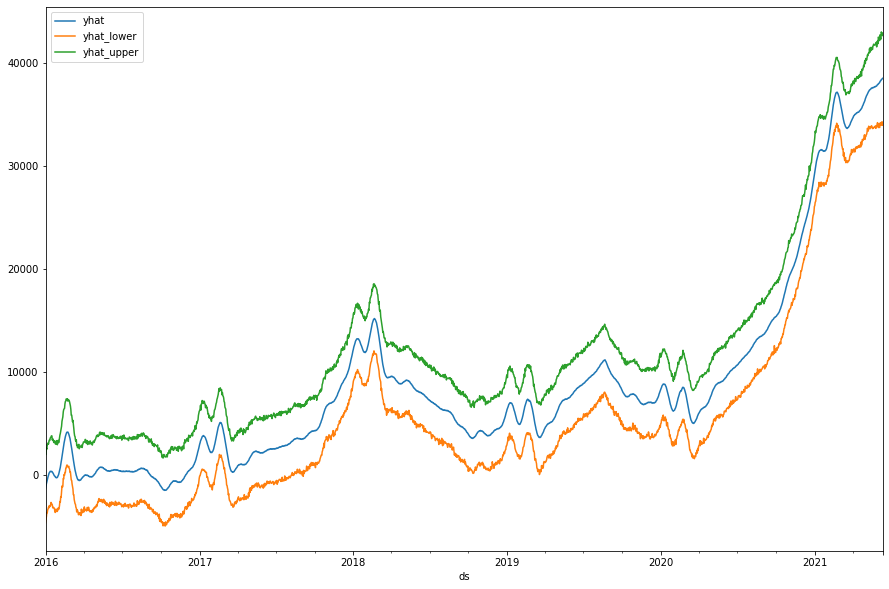

In [23]:
predict.set_index('ds').plot(figsize= (15,10))

**Plotting the model for reference**

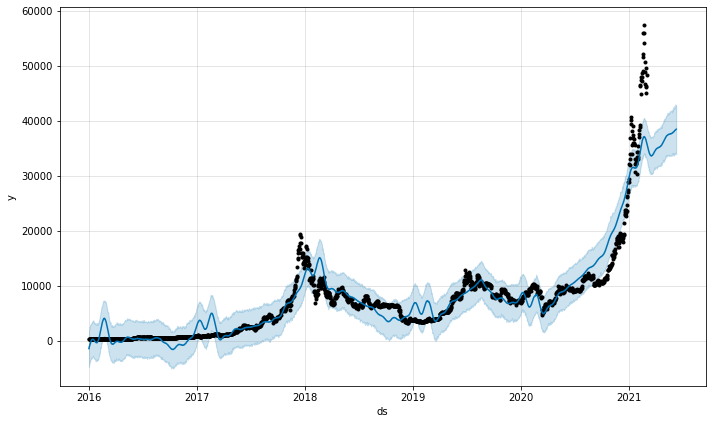

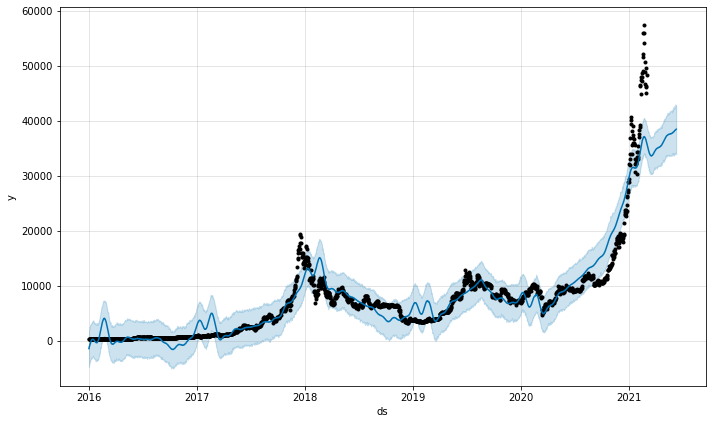

In [19]:
model.plot(graph)